In [1]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

### Assignment # 1
We will explore the use of Monterrey's city subway. Data is can be downloaded as a csv file at INEGI's site: https://www.inegi.org.mx/app/tabulados/?nc=100100049 . It shows the number of passengers per month (in thousands) from January 2018 to June 2020. To compare the same time periods, we will restrict our attention to the first six months of every year. 

In [2]:
df <- read.csv(file = 'Tabulado-metrorrey.csv')

In [4]:
df

Periodo,Longitud.en.servicio.....km...a,Trenes.en.servicio..a,Kilómetros.recorridos.....Miles.de.kilómetros.,Pasajeros.transportados.....Miles.de.pasajeros.,Ingresos.por.pasaje.....Miles.de.pesos.,Energia.eléctrica.consumida.....Miles.de.KWH..b
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2018,,NA,NA,NA,NA,NA
Enero,32,40,837.346,13529.975,33945.97,2999.103
Febrero,32,40,750.995,14404.827,35350.89,2768.079
Marzo,32,40,811.256,15102.947,37069.06,3081.705
Abril,32,40,816.056,14991.675,36218.61,2980.418
Mayo,32,40,842.884,15999.968,39322.05,3212.043
Junio,32,40,814.062,14314.628,35505.47,3405.397
Julio,32,40,841.440,14527.242,36103.93,3569.510
Agosto,32,40,830.254,16085.637,37601.06,3608.949


The table has additional data which we will not use for now. So we extract the column ```Pasajeros Transportados ... miles de pasajeros``` which is Spanish for ```Passengers transported ... thousands of passengers```.
Also, because of the table structure, there will be some NA in the column with the number of passengers, corresponding to the change of years. We will get rid of those and keep only the numerical data

In [5]:
passng = df$Pasajeros.transportados.....Miles.de.pasajeros.

In [6]:
passng = passng[!is.na(passng)]

We extrat the number of passengers for the first six months of each year, which correspond to the months 1 to 6, 13 to 18 and 25 to 30 from our list

In [7]:
passng2018 = passng[1:6]

In [8]:
passng2019 = passng[13:18]

In [9]:
passng2020 = passng[25:30]

Here is a summary of the data

In [10]:
summary(passng2018)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13530   14337   14698   14724   15075   16000 

In [11]:
summary(passng2019)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14511   14566   14705   14966   14808   16515 

In [12]:
summary(passng2020)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4933    6042    9881   10186   14554   15548 

Since current year is anomalous due to SARS-Cov-2 pandemic, we show three boxplots: first, one for the years 2018-2019; next, a boxplot for 2020 alone; and finally, a boxplot for all of three years.

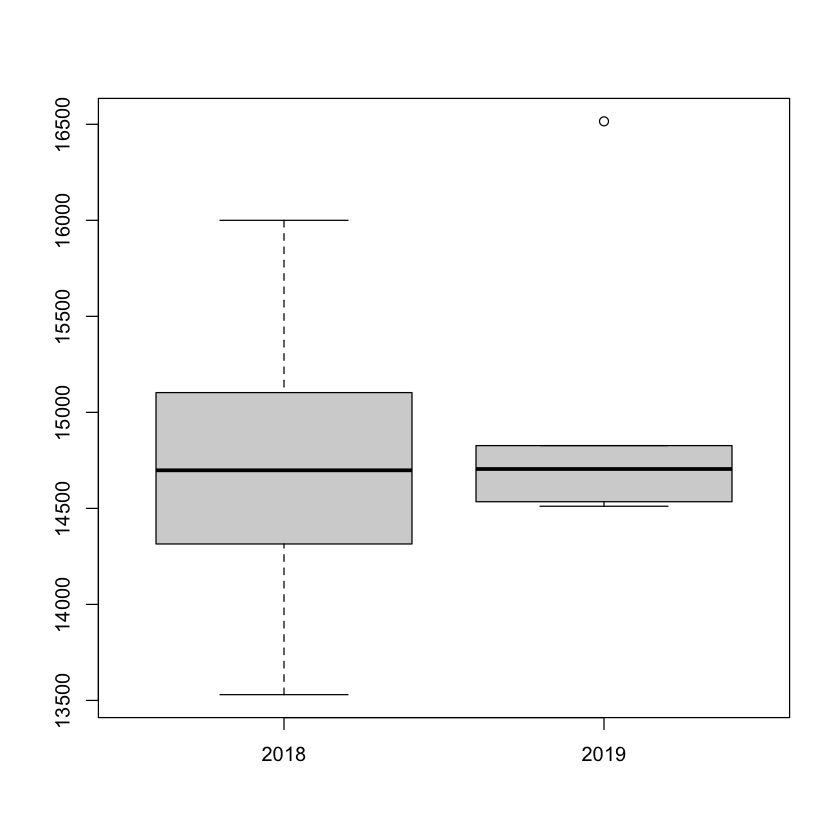

In [13]:
boxplot(passng2018, passng2019, names = c("2018", "2019"))

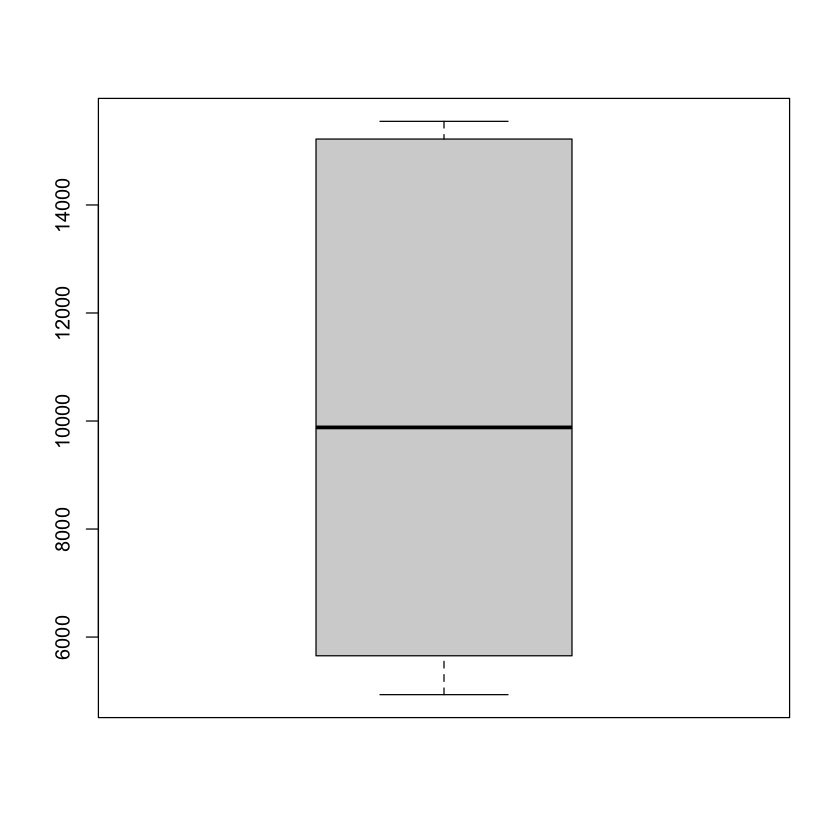

In [14]:
boxplot(passng2020, names = c("2020"))

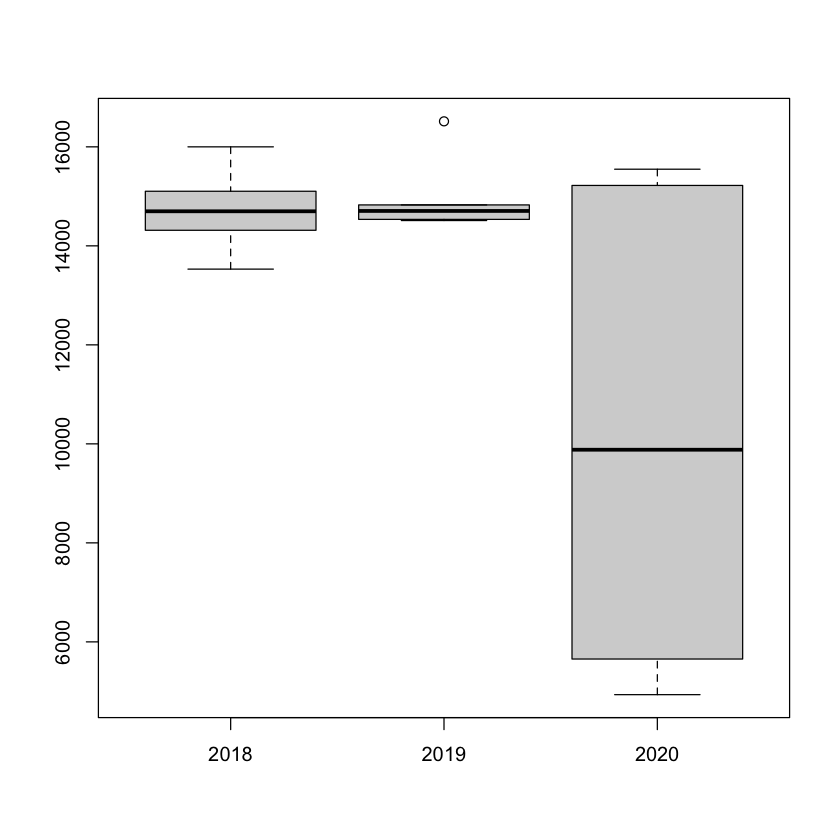

In [15]:
boxplot(passng2018, passng2019, passng2020, names = c("2018", "2019", "2020"))

--------------------------

We will now show three violin plots, just as before: one with 2018 and 2019 data, one with 2020 data, and one with all the data. 
To plot the violin chart, we need the ```ggplot2``` library. Intuitively (at least from my understanding) the violin plot displays the same information as a boxplot, but instead of having a rectangle-shaped figure, you get an approximation of the density of the data.

In [16]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”


In [17]:
df1 <- data.frame(year = strrep(c("2018"), seq(1,1, length.out=6)), passengers = passng2018)

In [18]:
df2 <- data.frame(year = strrep(c("2019"), seq(1,1, length.out=6)), passengers = passng2019)

In [19]:
df3 <- data.frame(year = strrep(c("2020"), seq(1,1, length.out=6)), passengers = passng2020)

In [20]:
df_1819 <- rbind(df1, df2)

In [21]:
df <- rbind(df1, df2, df3)

In [22]:
p <- ggplot(df_1819, aes(x=year, y=passengers, fill=year)) + # fill=name allow to automatically dedicate a color for each group
  geom_violin()

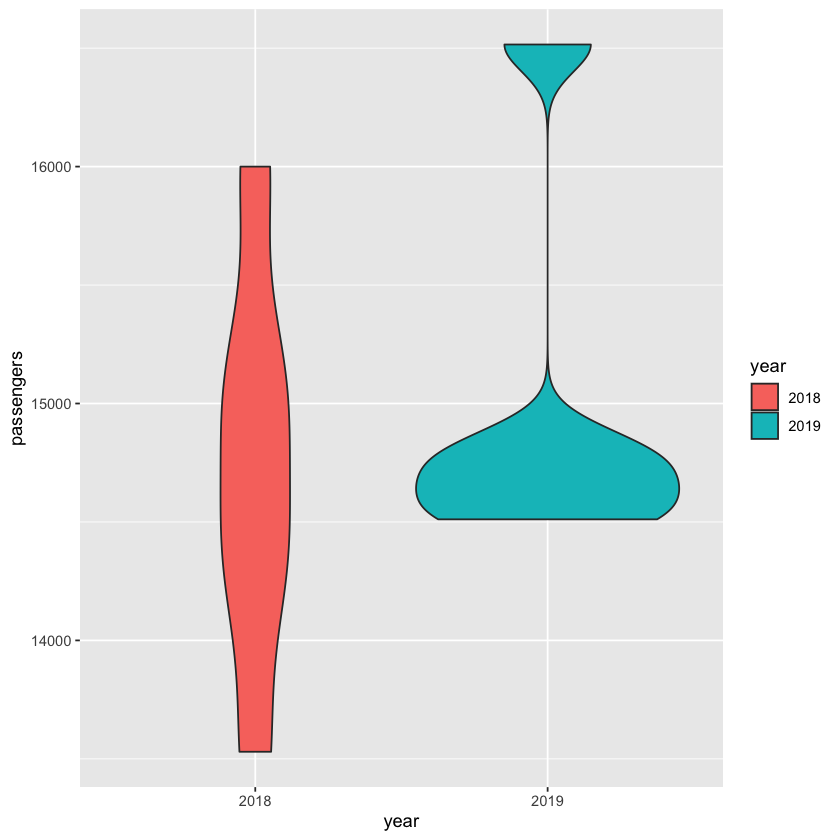

In [23]:
p

In [24]:
p <- ggplot(df3, aes(x=year, y=passengers, fill=year)) + # fill=name allow to automatically dedicate a color for each group
  geom_violin()

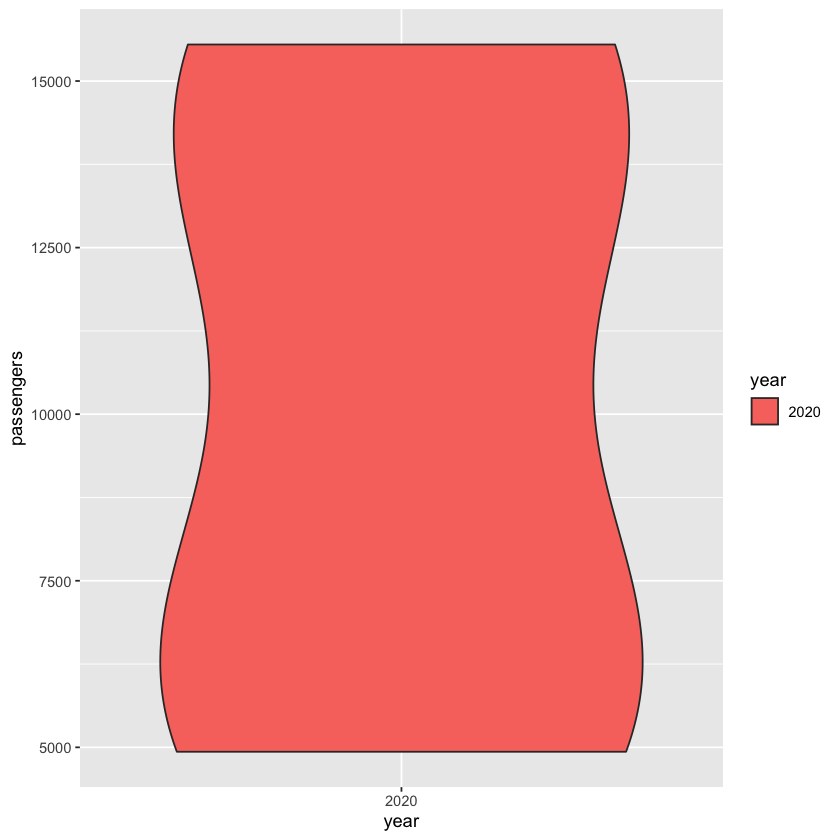

In [25]:
p

In [26]:
p <- ggplot(df, aes(x=year, y=passengers, fill=year)) + # fill=name allow to automatically dedicate a color for each group
  geom_violin()

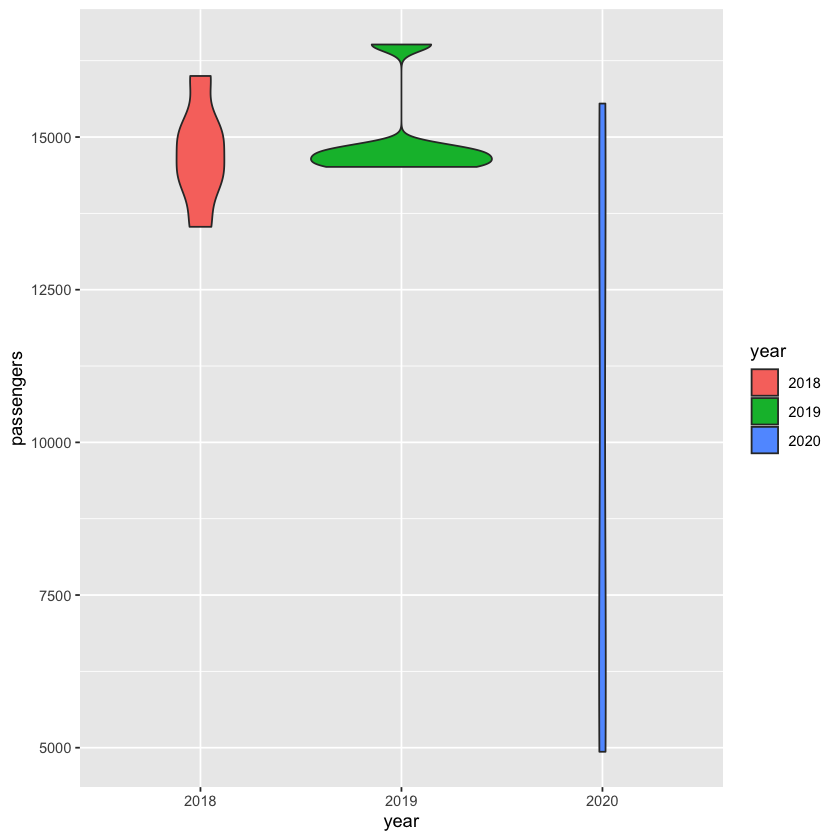

In [27]:
p

Finally, to show the impact the covid-19 has had in the movement of people, we show a bar plot of our data

In [28]:
df$month = c(seq(1, 6, by=1), seq(1, 6, by=1), seq(1, 6, by=1))

In [29]:
p = ggplot(df, aes(x=month, y=passengers, fill=year)) + 
  geom_bar(stat="identity", width = .5, position=position_dodge())

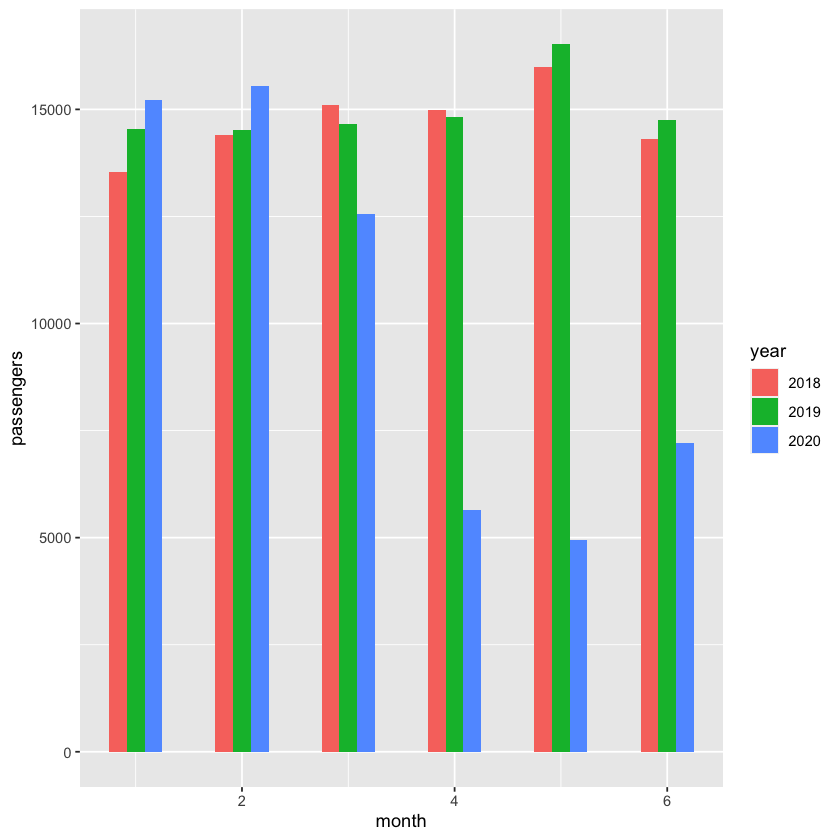

In [30]:
p